<a href="https://colab.research.google.com/github/Mlinfeng/MatchCode/blob/main/Markov_chains.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# First, install the markovchain package if you haven't already
install.packages("markovchain", repos = "https://cloud.r-project.org")
library(markovchain)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Package:  markovchain
Version:  0.9.5
Date:     2023-09-24 09:20:02 UTC
BugReport: https://github.com/spedygiorgio/markovchain/issues




**Exercise01**

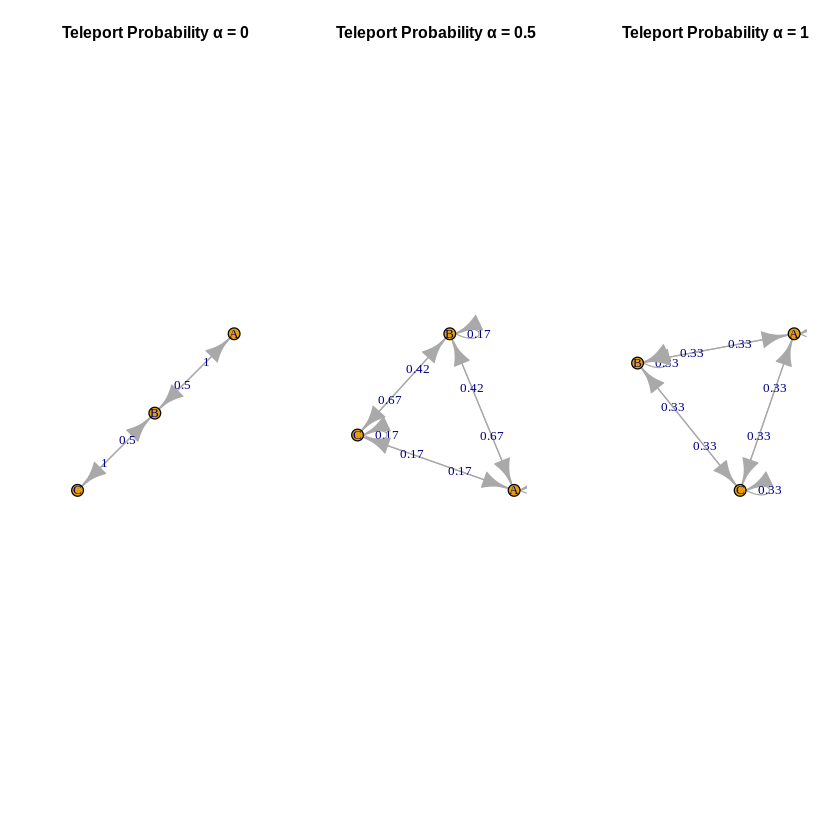

In [3]:
# Load the markovchain package for dealing with Markov chains
if (!require(markovchain)) {
  install.packages("markovchain")
}
library(markovchain)

# Define a function to create a transition matrix with teleporting
create_teleporting_matrix <- function(alpha) {
  # Number of nodes
  n <- 3

  # Create a matrix filled with teleporting probabilities
  teleport_matrix <- matrix(rep(alpha / n, n * n), nrow = n, byrow = TRUE)

  # Create a transition matrix without teleporting (base transition probabilities)
  # Assuming A → B, C → B, B → A, B → C with equal transition probabilities
  base_transition_matrix <- matrix(0, n, n)
  base_transition_matrix[1, 2] <- 1   # A → B
  base_transition_matrix[2, 1] <- 0.5 # B → A
  base_transition_matrix[2, 3] <- 0.5 # B → C
  base_transition_matrix[3, 2] <- 1   # C → B

  # Calculate the final transition matrix with teleporting
  final_matrix <- (1 - alpha) * base_transition_matrix + teleport_matrix
  rownames(final_matrix) <- colnames(final_matrix) <- c("A", "B", "C")

  return(final_matrix)
}

# Define teleport probabilities
alphas <- c(0, 0.5, 1)

# Calculate and plot the transition matrices for each alpha
par(mfrow = c(1, 3)) # Set up the plotting area to have 3 plots in a row

for (alpha in alphas) {
  transition_matrix <- create_teleporting_matrix(alpha)
  mc <- new("markovchain", transitionMatrix = transition_matrix)
  plot(mc, main = paste("Teleport Probability α =", alpha))
}


Exercise 2 A user of a browser can, in addition to clicking a hyperlink on the page x he is currently browsing, use the back button to go back to the page from which he arrived at x. Can such a user of back buttons be modeled as a Markov chain? How would we model repeated invocations of the back button?

In [4]:
set.seed(123) # For reproducibility

# Define the web graph as a list of possible forward transitions
web_graph <- list(
  "A" = "B", # From A, the user can only go to B
  "B" = c("A", "C"), # From B, the user can go to A or C
  "C" = "B"  # From C, the user can only go to B
)

# Function to simulate the browsing behavior
simulate_browsing <- function(start_page, num_steps) {
  history_stack <- c(start_page) # Initialize the stack with the starting page
  current_page <- start_page

  for (i in 1:num_steps) {
    action <- sample(c("forward", "back"), 1) # Randomly choose to go forward or back

    if (action == "forward") {
      # Get the possible forward transitions from the current page
      next_pages <- web_graph[[current_page]]

      if (length(next_pages) > 0) {
        next_page <- sample(next_pages, 1) # Randomly select the next page
        history_stack <- c(history_stack, next_page) # Push the next page onto the stack
        current_page <- next_page
      }
    } else if (action == "back" && length(history_stack) > 1) {
      history_stack <- head(history_stack, -1) # Pop the last page from the stack
      current_page <- tail(history_stack, 1) # The current page is now the last page in the stack
    }

    cat(sprintf("Step %d: %s, Current page: %s, History: %s\n", i, action, current_page, toString(history_stack)))
  }
}

# Simulate the user's browsing session starting from page A for 10 steps
simulate_browsing("A", 10)


Step 1: forward, Current page: B, History: A, B
Step 2: forward, Current page: C, History: A, B, C
Step 3: forward, Current page: B, History: A, B, C, B
Step 4: back, Current page: C, History: A, B, C
Step 5: back, Current page: B, History: A, B
Step 6: forward, Current page: A, History: A, B, A
Step 7: back, Current page: B, History: A, B
Step 8: back, Current page: A, History: A
Step 9: back, Current page: A, History: A
Step 10: forward, Current page: B, History: A, B


Exercise 3 Consider a Markov chain with three states A, B and C, and transition probabilities as follows. From state A, the next state is B with probability 1. From B, the next state is either A with probability pA, or state C with probability 1 − pA. From C the next state is A with probability 1. For what values of pA ∈ [0, 1] is this Markov chain ergodic?

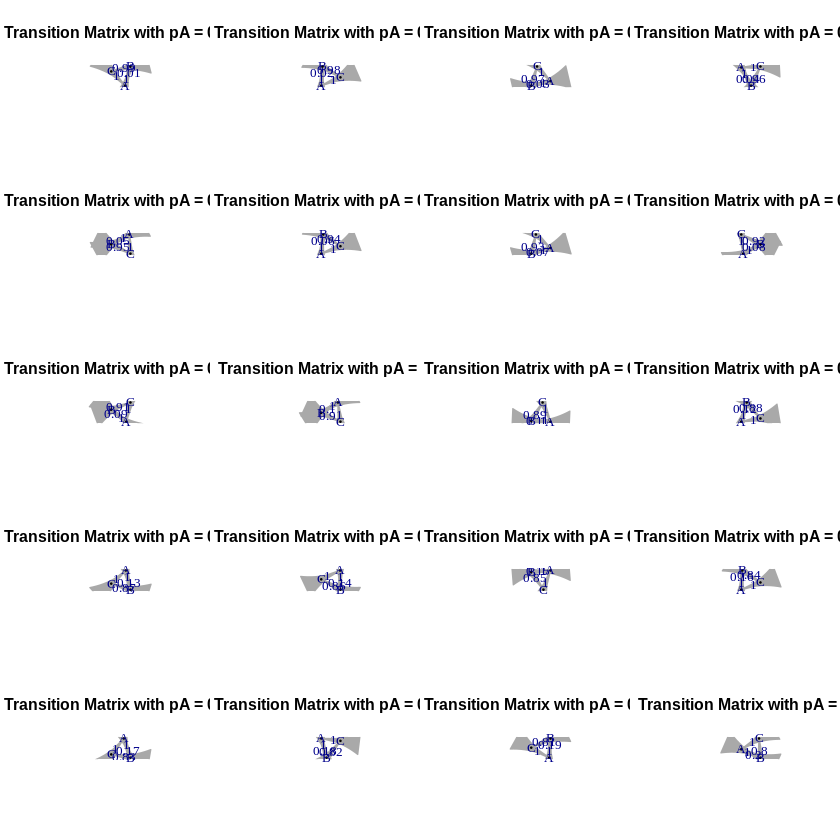

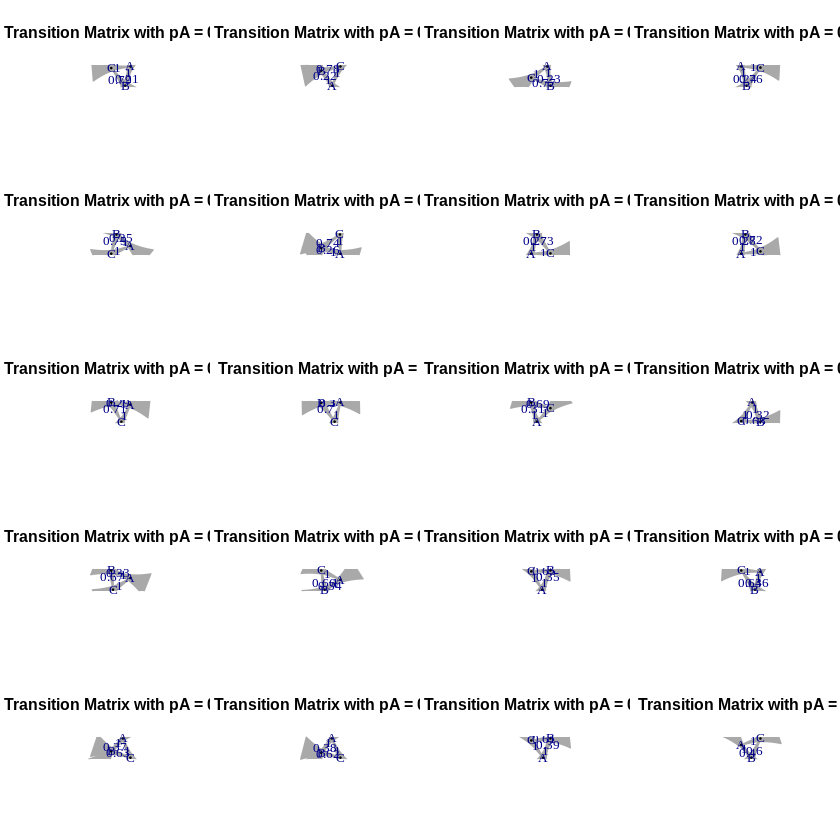

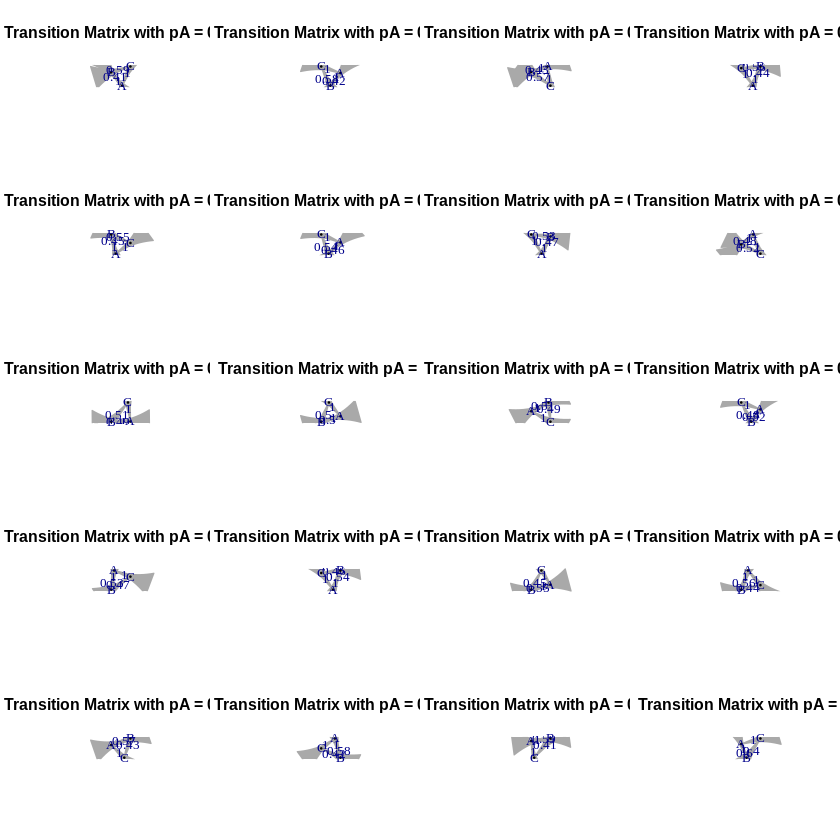

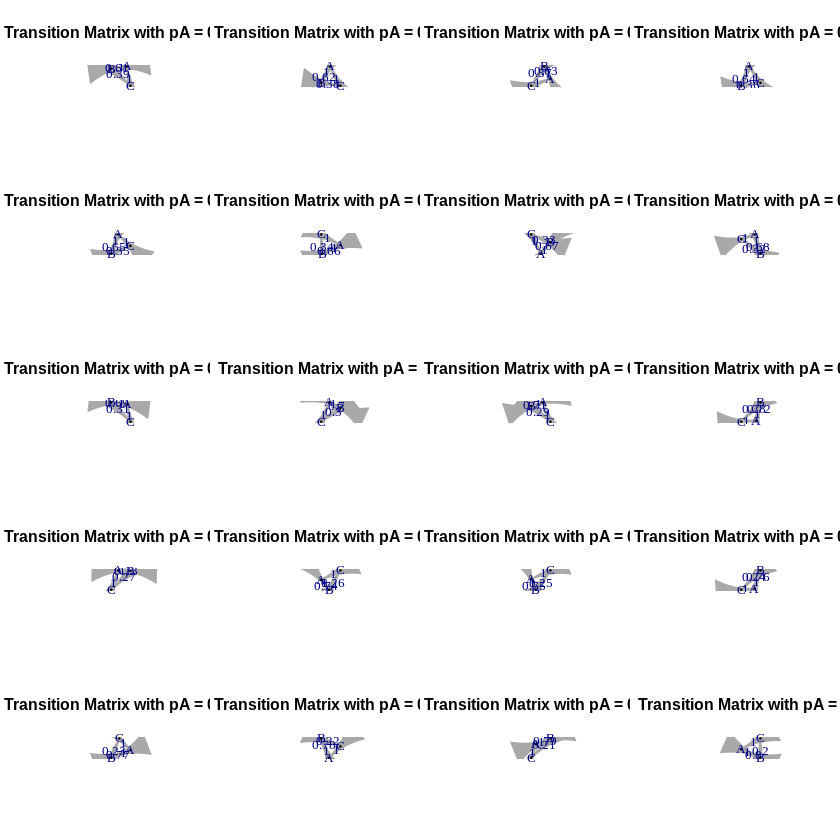

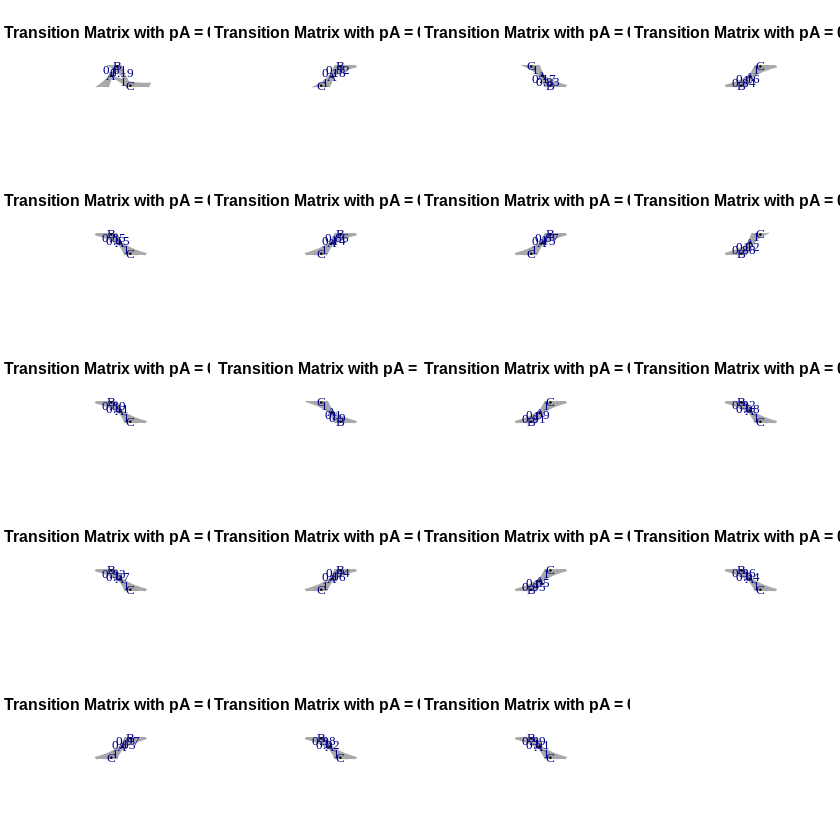

In [5]:
# Load the markovchain package for dealing with Markov chains
if (!require(markovchain)) {
  install.packages("markovchain")
}
library(markovchain)

# Define a function to create a transition matrix for different values of pA
create_transition_matrix <- function(pA) {
  transitionMatrix <- matrix(c(
    0, 1, 0,   # From A to B with probability 1
    pA, 0, 1-pA, # From B to A with pA, B to C with 1-pA
    1, 0, 0    # From C to A with probability 1
  ), byrow = TRUE, nrow = 3, dimnames = list(c("A", "B", "C"), c("A", "B", "C")))

  return(new("markovchain", transitionMatrix = transitionMatrix))
}

# Plot the transition matrix for a range of pA values
pA_values <- seq(0.01, 0.99, by = 0.01) # Excludes the endpoints 0 and 1
par(mfrow = c(5, 4)) # Plotting area setup to display multiple plots

for (pA in pA_values) {
  mc <- create_transition_matrix(pA)
  plot(mc, main = paste("Transition Matrix with pA =", round(pA, 2)))
}


**练习**

In [ ]:
# Define the transition matrix from the graph
transition_matrix <- matrix(c(
  0.02, 0.02, 0.02, 0.31, 0.02, 0.02, # transitions from d1
  0.02, 0.45, 0.02, 0.02, 0.02, 0.02, # transitions from d2
  0.88, 0.45, 0.31, 0.02, 0.02, 0.02, # transitions from d3
  0.02, 0.02, 0.45, 0.02, 0.88, 0.45, # transitions from d4
  0.02, 0.02, 0.02, 0.02, 0.02, 0.02, # transitions from d5
  0.02, 0.02, 0.02, 0.31, 0.02, 0.02  # transitions from d6
), nrow = 6, byrow = TRUE)

# Define the teleportation rate
teleportation_rate <- 0.14

# Define the damping factor which is 1 - teleportation_rate
damping_factor <- 1 - teleportation_rate

# Initialize the PageRank vector with equal values
page_rank_vector <- rep(1 / ncol(transition_matrix), ncol(transition_matrix))

# Define the number of iterations for the algorithm
iterations <- 100

for (i in 1:iterations) {
  # Calculate the new PageRank vector
  page_rank_vector <- damping_factor * (transition_matrix %*% page_rank_vector) +
    (teleportation_rate / ncol(transition_matrix))

  # Normalize the PageRank vector
  page_rank_vector <- page_rank_vector / sum(page_rank_vector)
}

# Print the PageRank vector
print(page_rank_vector)


           [,1]
[1,] 0.13610477
[2,] 0.08871809
[3,] 0.30142221
[4,] 0.28861856
[5,] 0.04903159
[6,] 0.13610477


    A   B   C
A 0.2 0.5 0.3
B 0.1 0.6 0.3
C 0.4 0.2 0.4



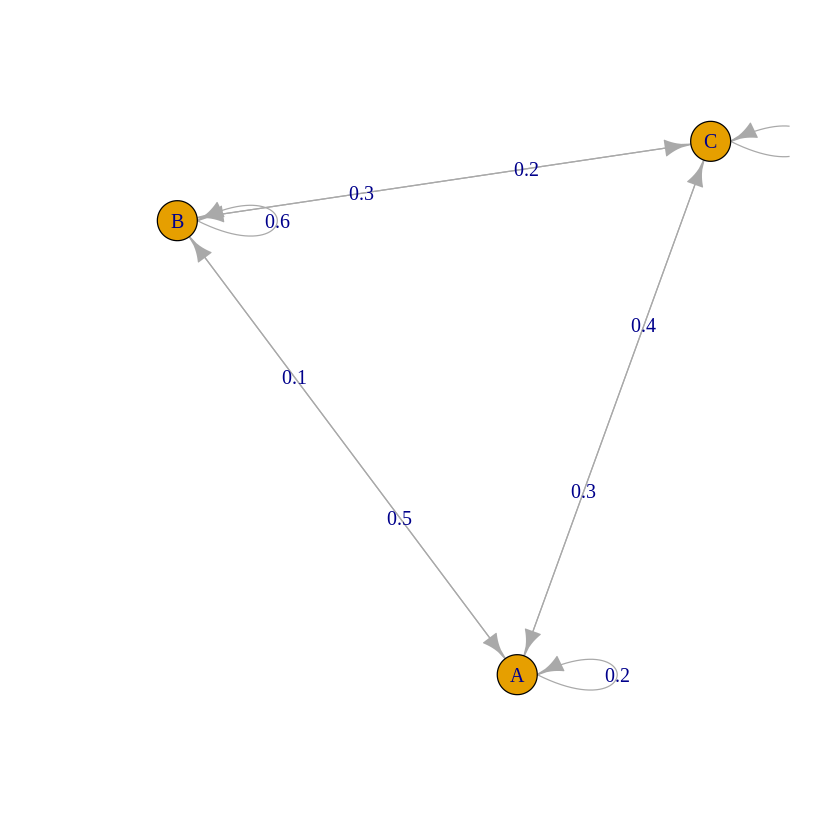

In [ ]:
# Define the states of the Markov chain
states <- c("A", "B", "C")

# Create a transition matrix with hypothetical probabilities
# Replace these with the actual probabilities if you have them
transitionMatrix <- matrix(data = c(
  0.2, 0.5, 0.3,  # Probabilities of going from A to A, B, and C
  0.1, 0.6, 0.3,  # Probabilities of going from B to A, B, and C
  0.4, 0.2, 0.4   # Probabilities of going from C to A, B, and C
), byrow = TRUE, nrow = 3, dimnames = list(states, states))

# Create the Markov chain object
mc <- new("markovchain", states = states, byrow = TRUE, transitionMatrix = transitionMatrix)

# Display the Markov chain
print(mc)

# Plot the Markov chain
plot(mc)